In [1]:
import os
from glob import glob
import numpy as np
from scipy import ndimage, stats
import matplotlib.pyplot as plt

import rasterio
from rasterio import features
from rasterio.plot import show, plotting_extent

In [2]:
os.chdir("C:/EAGLE/trace_gfz/tile_analysis/sample")

In [3]:
# List all images
tiles = glob(os.path.join(os.getcwd(), 'input', 'vessel', '*'))

In [4]:
# Read image
with rasterio.open(tiles[27]) as src:
    img = src.read()
    kwargs = src.meta.copy()

C:\Users\kemme\miniconda3\envs\earthlab\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [5]:
print(img.shape)
kwargs

(4, 42, 42)


{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 42,
 'height': 42,
 'count': 4,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

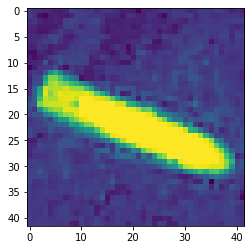

<AxesSubplot:>

In [6]:
show(img[0])

### 0. Histogram

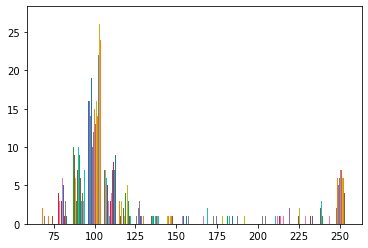

In [7]:
plt.hist(img[0], bins=20)
plt.show()

In [8]:
np.histogram(img[0], bins=10)

(array([117, 985, 282,  44,  23,  29,  24,  27,  33, 200], dtype=int64),
 array([ 67. ,  85.8, 104.6, 123.4, 142.2, 161. , 179.8, 198.6, 217.4,
        236.2, 255. ]))

### 1. Standardize Image

In [9]:
def normalize1(img):
    z_score = np.zeros(img.shape)
    for i in range(0, len(img)):
        mu = float(img[i].mean())
        sigma = float(img[i].std())
        z_score[i] = (img[i]-mu)/sigma
    return z_score

In [10]:
img_nor = normalize1(img)
img_nor.shape

__main__:6: RuntimeWarning: invalid value encountered in true_divide


(4, 42, 42)

### 2. Reclassify with threshold 97.5% (z-score >1.96)

In [11]:
binary = np.where(img_nor > 1.96, 1, 0)
binary = binary[0]
# Select only one band (RED in this case)

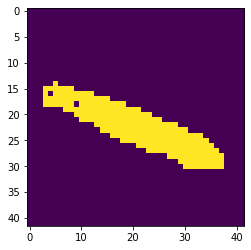

<AxesSubplot:>

In [12]:
show(binary)

### 3. Spatial Filter (3x3, mode)

In [13]:
# Function to get statistical Mode of numpy array
def getMode(x):
    return float(stats.mode(x)[0])

In [14]:
# Apply 3x3 spatial filter (moving window)
binary_flt = ndimage.generic_filter(binary, function=getMode, size=3)
binary_flt.shape

(42, 42)

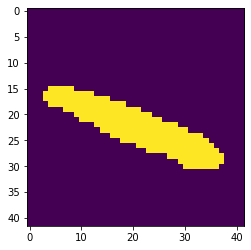

<AxesSubplot:>

In [15]:
show(binary_flt)

### 4. Export Filtered Raster

In [16]:
#binary_flt = binary_flt.astype('uint8')

In [17]:
# Update Metadata
#kwargs.update({
#    "driver": "GTiff",
#    "count": 1,
#    "height": binary_flt.shape[0],
#    "width": binary_flt.shape[1],
#    "transform": kwargs['transform'],
#    "crs": kwargs['crs']
#})

In [18]:
# Export Masked DEM
#outpath_msk = os.path.join(os.getcwd(), 'output', 'thdFilter', tiles[27].split('.')[0].split('\\')[-1]+"_msk.tif")
#with rasterio.open(outpath_msk, "w", **kwargs) as dest:
#    dest.write(binary_flt, indexes=1)

### SP: Display Rasters

In [19]:
img_net = glob(os.path.join(os.getcwd(), 'input', 'net', '*'))
img_net.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

img_vessel = glob(os.path.join(os.getcwd(), 'input', 'vessel', '*'))
img_vessel.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [20]:
msk_net = glob(os.path.join(os.getcwd(), 'output', 'thdFilter', 'net', '*'))
msk_net.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

msk_vessel = glob(os.path.join(os.getcwd(), 'output', 'thdFilter', 'vessel', '*'))
msk_vessel.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [21]:
# Set of random number generator
#np.random.seed(0)
# Array of Random Integer
index_net = np.random.randint(low=0, high=len(msk_net), size=10)
index_vessel = np.random.randint(low=0, high=len(msk_vessel), size=10)
print(index_net, '\n', index_vessel)

[283 225 306 183  39 129  16 313  53 170] 
 [37 33 39 38 23  2  0  8 10 17]


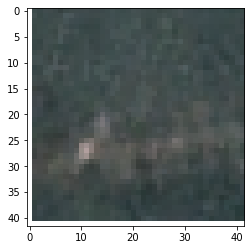

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_283.tif


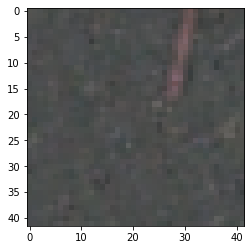

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_225.tif


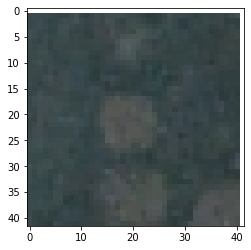

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_306.tif


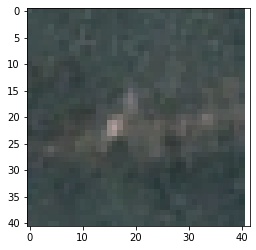

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_183.tif


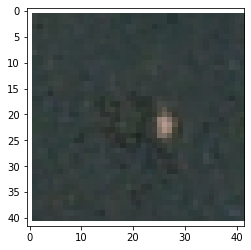

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_039.tif


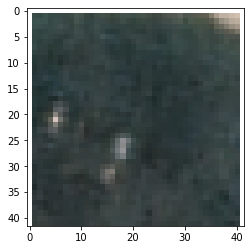

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_129.tif


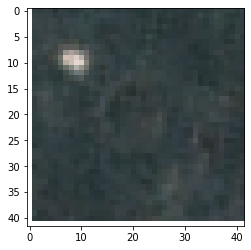

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_016.tif


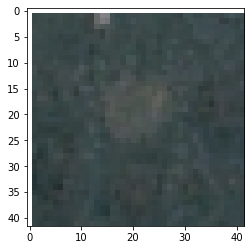

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_313.tif


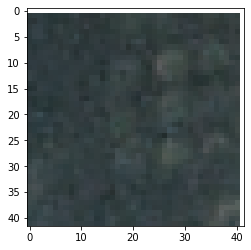

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_053.tif


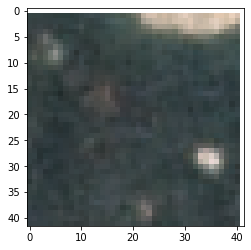

C:\EAGLE\trace_gfz\tile_analysis\sample\input\net\net_170.tif


In [22]:
for i in index_net:
    with rasterio.open(img_net[i]) as src:
        img = src.read()
    show(img)
    print(img_net[i])

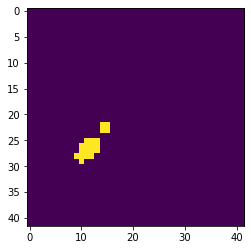

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_283_msk.tif


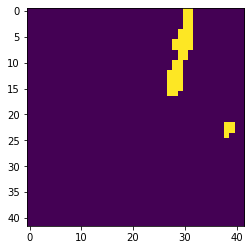

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_225_msk.tif


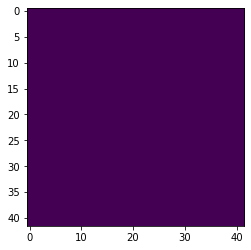

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_306_msk.tif


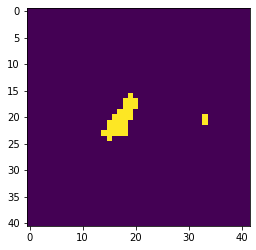

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_183_msk.tif


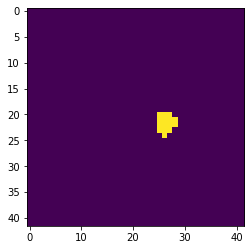

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_039_msk.tif


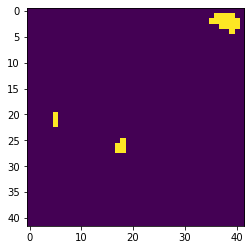

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_129_msk.tif


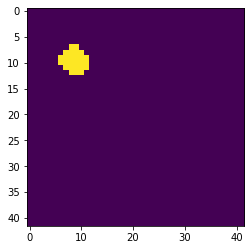

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_016_msk.tif


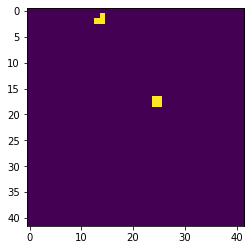

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_313_msk.tif


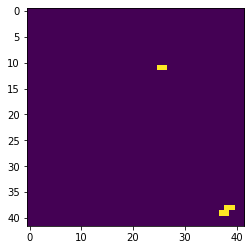

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_053_msk.tif


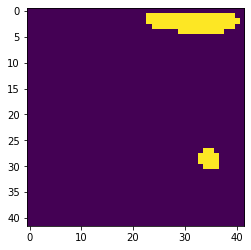

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\net\net_170_msk.tif


In [23]:
for i in index_net:
    with rasterio.open(msk_net[i]) as src:
        msk = src.read(1)
    show(msk)
    print(msk_net[i])

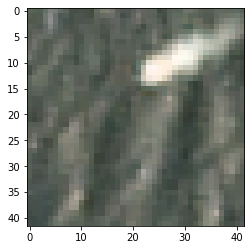

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_037.tif


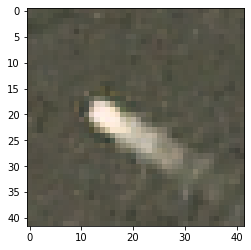

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_033.tif


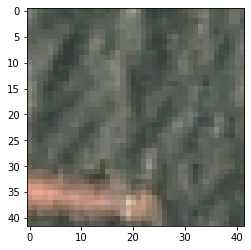

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_039.tif


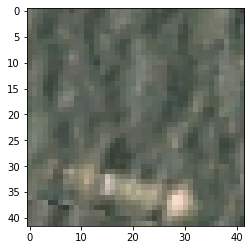

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_038.tif


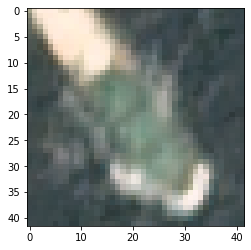

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_023.tif


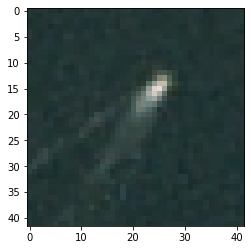

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_002.tif


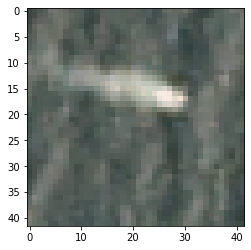

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_000.tif


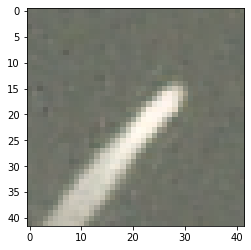

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_008.tif


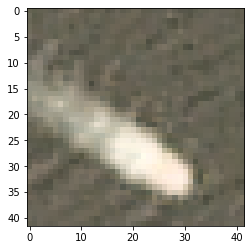

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_010.tif


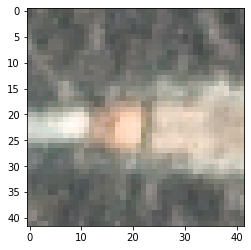

C:\EAGLE\trace_gfz\tile_analysis\sample\input\vessel\vessel_017.tif


In [24]:
for i in index_vessel:
    with rasterio.open(img_vessel[i]) as src:
        img = src.read()
    show(img)
    print(img_vessel[i])

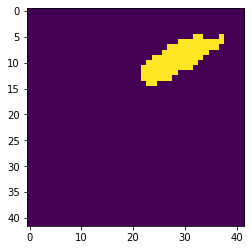

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_037_msk.tif


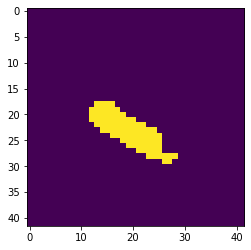

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_033_msk.tif


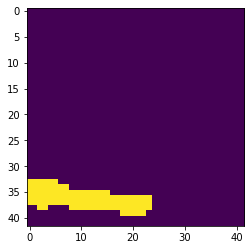

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_039_msk.tif


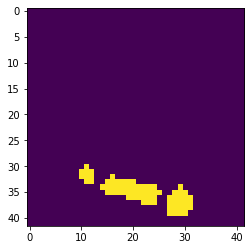

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_038_msk.tif


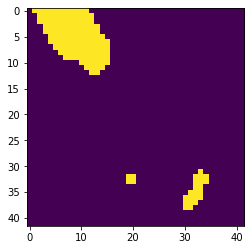

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_023_msk.tif


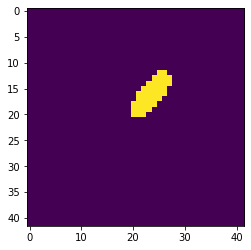

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_002_msk.tif


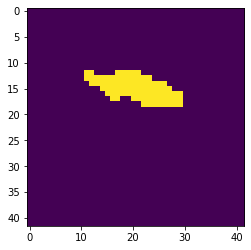

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_000_msk.tif


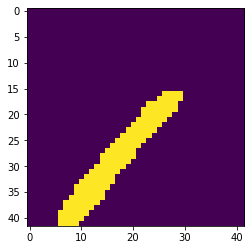

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_008_msk.tif


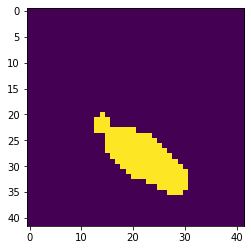

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_010_msk.tif


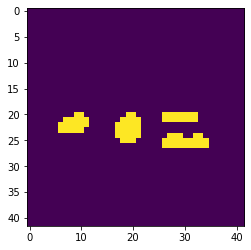

C:\EAGLE\trace_gfz\tile_analysis\sample\output\thdFilter\vessel\vessel_017_msk.tif


In [25]:
for j in index_vessel:
    with rasterio.open(msk_vessel[j]) as src:
        msk = src.read(1)
    show(msk)
    print(msk_vessel[j])

### 5. Extract Feature and Coordinates

In [26]:
inpath_msk = glob(os.path.join(os.getcwd(), 'output', 'thdFilter', 'vessel', '*'))
inpath_msk[0]

'C:\\EAGLE\\trace_gfz\\tile_analysis\\sample\\output\\thdFilter\\vessel\\vessel_000_msk.tif'

In [27]:
with rasterio.open(inpath_msk[0]) as src:
    feat_msk = src.read(1)
feat_msk.shape

(42, 42)

In [28]:
# Extract Feature and Coordinates from Filtered Raster
mask = feat_msk !=0
shapes = features.shapes(feat_msk, mask=mask, transform=src.transform)
feat_tuple = next(shapes)
feat_tuple

({'type': 'Polygon',
  'coordinates': [[(739815.625, 3764525.0),
    (739815.625, 3764518.75),
    (739818.75, 3764518.75),
    (739818.75, 3764515.625),
    (739825.0, 3764515.625),
    (739825.0, 3764512.5),
    (739828.125, 3764512.5),
    (739828.125, 3764509.375),
    (739831.25, 3764509.375),
    (739831.25, 3764506.25),
    (739837.5, 3764506.25),
    (739837.5, 3764509.375),
    (739843.75, 3764509.375),
    (739843.75, 3764506.25),
    (739850.0, 3764506.25),
    (739850.0, 3764503.125),
    (739871.875, 3764503.125),
    (739875.0, 3764503.125),
    (739875.0, 3764512.5),
    (739868.75, 3764512.5),
    (739868.75, 3764515.625),
    (739865.625, 3764515.625),
    (739865.625, 3764518.75),
    (739856.25, 3764518.75),
    (739856.25, 3764521.875),
    (739850.0, 3764521.875),
    (739850.0, 3764525.0),
    (739834.375, 3764525.0),
    (739834.375, 3764521.875),
    (739821.875, 3764521.875),
    (739821.875, 3764525.0),
    (739815.625, 3764525.0)]]},
 1.0)

In [29]:
feat_tuple[0]['coordinates']

[[(739815.625, 3764525.0),
  (739815.625, 3764518.75),
  (739818.75, 3764518.75),
  (739818.75, 3764515.625),
  (739825.0, 3764515.625),
  (739825.0, 3764512.5),
  (739828.125, 3764512.5),
  (739828.125, 3764509.375),
  (739831.25, 3764509.375),
  (739831.25, 3764506.25),
  (739837.5, 3764506.25),
  (739837.5, 3764509.375),
  (739843.75, 3764509.375),
  (739843.75, 3764506.25),
  (739850.0, 3764506.25),
  (739850.0, 3764503.125),
  (739871.875, 3764503.125),
  (739875.0, 3764503.125),
  (739875.0, 3764512.5),
  (739868.75, 3764512.5),
  (739868.75, 3764515.625),
  (739865.625, 3764515.625),
  (739865.625, 3764518.75),
  (739856.25, 3764518.75),
  (739856.25, 3764521.875),
  (739850.0, 3764521.875),
  (739850.0, 3764525.0),
  (739834.375, 3764525.0),
  (739834.375, 3764521.875),
  (739821.875, 3764521.875),
  (739821.875, 3764525.0),
  (739815.625, 3764525.0)]]

In [30]:
## Back-up Method:
# Get the index (row,col) of the pixels having value 1
feat_index = np.transpose(np.nonzero(feat_msk==1))
# Get the coordinates based on the indexes
feat_xy = [src.xy(col,row) for col, row in feat_index]
len(feat_xy)

84